In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium 


In [2]:
#datasets
dataset = pd.read_csv('DataExtract.csv')

In [3]:
dataset.dtypes

Country                                                            object
Air Quality Network                                                object
Air Quality Network Name                                           object
Air Quality Station EoI Code                                       object
Air Quality Station Name                                           object
Sampling Point Id                                                  object
Air Pollutant                                                      object
Air Pollutant Description                                          object
Data Aggregation Process Id                                        object
Data Aggregation Process                                           object
Year                                                                int64
Air Pollution Level                                               float64
Unit Of Air Pollution Level                                        object
Data Coverage                         

In [4]:
list(dataset.columns)

['Country',
 'Air Quality Network',
 'Air Quality Network Name',
 'Air Quality Station EoI Code',
 'Air Quality Station Name',
 'Sampling Point Id',
 'Air Pollutant',
 'Air Pollutant Description',
 'Data Aggregation Process Id',
 'Data Aggregation Process',
 'Year',
 'Air Pollution Level',
 'Unit Of Air Pollution Level',
 'Data Coverage',
 'Verification',
 'Air Quality Station Type',
 'Air Quality Station Area',
 'Longitude',
 'Latitude',
 'Altitude',
 'City',
 'City Code',
 'City Population',
 'Source Of Data Flow',
 'Calculation Time',
 'Link to raw data (only E1a/validated data from AQ e-Reporting)']

In [5]:
df_dataset = pd.DataFrame(data=dataset)
df_dataset.head()

Country Air Quality Network     Air Quality Network Name  \
0  Serbia          NET-RS002A  Serbian national AQ network   
1  Serbia          NET-RS002A  Serbian national AQ network   
2  Serbia          NET-RS002A  Serbian national AQ network   
3  Serbia          NET-RS002A  Serbian national AQ network   
4  Serbia          NET-RS002A  Serbian national AQ network   

  Air Quality Station EoI Code Air Quality Station Name  \
0                      RS0034A                  Kikinda   
1                      RS0034A                  Kikinda   
2                      RS0034A                  Kikinda   
3                      RS0034A                  Kikinda   
4                      RS0034A                  Kikinda   

       Sampling Point Id Air Pollutant Air Pollutant Description  \
0  SPO-RS0034A_00001_100           SO2     Sulphur dioxide (air)   
1  SPO-RS0034A_00001_100           SO2     Sulphur dioxide (air)   
2  SPO-RS0034A_00001_100           SO2     Sulphur dioxide (air)   
3  SPO-RS0034A_00001_100           SO2     Sulphur dioxide (air)   
4  SPO-RS0034A_00001_100           SO2     Sulphur dioxide (air)   

  Data Aggregation Process Id                  Data Aggregation Process  ...  \
0                 P1Y-day-max                            1 year day max  ...   
1                P1Y-day-max4                          1 year day max 4  ...   
2        P1Y-day-max-per99.18  1 year 99.18 percentile of daily maximum  ...   
3                 P1Y-day-min                            1 year day min  ...   
4               P1Y-day-per50  1 year 50 %ile of daily values in a year  ...   

   Air Quality Station Area  Longitude Latitude  Altitude  City City Code  \
0                     Urban     20.454  45.8215      78.0   NaN       NaN   
1                     Urban     20.454  45.8215      78.0   NaN       NaN   
2                     Urban     20.454  45.8215      78.0   NaN       NaN   
3                     Urban     20.454  45.8215      78.0   NaN       NaN   
4                     Urban     20.454  45.8215      78.0   NaN       NaN   

  City Population                Source Of Data Flow     Calculation Time  \
0             NaN             E2a/UTD AQ e-Reporting  31/05/2022 20:00:24   
1             NaN  E1a/validated data AQ e-Reporting  31/05/2022 20:55:10   
2             NaN  E1a/validated data AQ e-Reporting  31/05/2022 20:36:04   
3             NaN  E1a/validated data AQ e-Reporting  31/05/2022 20:12:56   
4             NaN  E1a/validated data AQ e-Reporting  31/05/2022 20:37:34   

   Link to raw data (only E1a/validated data from AQ e-Reporting)  
0                                                NaN               
1  http://fme.discomap.eea.europa.eu/fmedatastrea...               
2  http://fme.discomap.eea.europa.eu/fmedatastrea...               
3  http://fme.discomap.eea.europa.eu/fmedatastrea...               
4  http://fme.discomap.eea.europa.eu/fmedatastrea...               

[5 rows x 26 columns]

In [7]:
locations =df_dataset.filter(['Air Quality Station Name'])
unique_locations = df_dataset['Air Quality Station Name'].unique()
unique_locations


array(['Kikinda', 'Pancevo-Sodara', 'Belgrade-Novi Beograd',
       'Belgrade-Vracar', 'Kostolac', 'Smederevo-Carina', 'Valjevo',
       'Bor-Institut', 'Kragujevac', 'Novi Sad-Rumenacka', 'Nis-IZJZ',
       'Novi Sad-Liman', 'Belgrade-Stari grad',
       'Nis-Osnovna skola Sveti Sava', 'Zajecar', 'Cacak-Institut',
       'Novi Sad 2', 'Pancevo 1', 'Kamenicki vis', 'Bor-Gradski park',
       'Belgrade-Mostar', 'Loznica', 'Krusevac', 'Kopaonik', 'Vranje',
       'Smederevo-Centar', 'Obrenovac-Centar', 'Kosjeric', 'Popovac',
       'Uzice', 'Novi Pazar', 'Belgrade-Bulevar Despota Stefana 54a',
       'Belgrade-Slavija', 'Beocin-Centar',
       'Belgrade-Omladinskih brigada', 'Belgrade-Ohridska', 'Sombor 1',
       'Zrenjanin 1', 'Zrenjanin 2', 'Kikinda 1', 'Kikinda 2', nan,
       'Beocin', 'Novi Sad 1', 'Pancevo 2', 'Subotica 1', 'Subotica 2',
       'Belgrade-Kosutnjak', 'Belgrade-Carli Caplina', 'Krusevac-RHMZ',
       'Smederevska Palanka-RHMZ', 'Valjevo-RHMZ', 'Vranje-RHMZ',
       

In [8]:
unique_years = df_dataset['Year'].unique()
print(sorted(unique_years))


[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [10]:
#4reuse
for col in df_dataset:
    print(df_dataset[col].unique())

['Serbia']
['NET-RS002A' 'NET-RS001A' 'NET-RS003A' nan]
['Serbian national AQ network' 'Local AQ network'
 'Air Quality Monitoring System of Belgrade' nan]
['RS0034A' 'RS0035A' 'RS0036A' 'RS0037A' 'RS0038A' 'RS0039A' 'RS0041A'
 'RS0042A' 'RS0043A' 'RS0029A' 'RS0030A' 'RS0031A' 'RS0032A' 'RS0033A'
 'RS0044A' 'RS0045A' 'RS0014A' 'RS0021A' 'RS0005R' 'RS0009A' 'RS0028A'
 'RS0040A' 'RS0046A' 'RS0047A' 'RS0048A' 'RS0050A' 'RS0051A' 'RS0052A'
 'RS0053A' 'RS0054A' 'RS0055A' 'RS0008A' 'RS0027A' 'RS0049A' 'RS0007A'
 'RS0006A' 'RS0015A' 'RS0017A' 'RS0018A' 'RS0019A' 'RS0020A' 'RS0026A'
 'RS0001A' 'RS0002A' 'RS0022A' 'RS0023A' 'RS0024A' 'RS0003A' 'RS0004A'
 'RS0005A' 'RS0010A' 'RS0011A' 'RS0012A' 'RS0013A' 'RS0025A']
['Kikinda' 'Pancevo-Sodara' 'Belgrade-Novi Beograd' 'Belgrade-Vracar'
 'Kostolac' 'Smederevo-Carina' 'Valjevo' 'Bor-Institut' 'Kragujevac'
 'Novi Sad-Rumenacka' 'Nis-IZJZ' 'Novi Sad-Liman' 'Belgrade-Stari grad'
 'Nis-Osnovna skola Sveti Sava' 'Zajecar' 'Cacak-Institut' 'Novi Sad 2'
 '

In [12]:
df2 = df_dataset.drop(columns=['Country', 'Sampling Point Id', 'Data Aggregation Process Id', 'Data Aggregation Process', 'City', 'City Code', 'City Population', 'Link to raw data (only E1a/validated data from AQ e-Reporting)'])
df2


Air Quality Network                   Air Quality Network Name  \
0              NET-RS002A                Serbian national AQ network   
1              NET-RS002A                Serbian national AQ network   
2              NET-RS002A                Serbian national AQ network   
3              NET-RS002A                Serbian national AQ network   
4              NET-RS002A                Serbian national AQ network   
...                   ...                                        ...   
12130          NET-RS003A  Air Quality Monitoring System of Belgrade   
12131          NET-RS003A  Air Quality Monitoring System of Belgrade   
12132          NET-RS003A  Air Quality Monitoring System of Belgrade   
12133          NET-RS003A  Air Quality Monitoring System of Belgrade   
12134          NET-RS003A  Air Quality Monitoring System of Belgrade   

      Air Quality Station EoI Code Air Quality Station Name Air Pollutant  \
0                          RS0034A                  Kikinda           SO2   
1                          RS0034A                  Kikinda           SO2   
2                          RS0034A                  Kikinda           SO2   
3                          RS0034A                  Kikinda           SO2   
4                          RS0034A                  Kikinda           SO2   
...                            ...                      ...           ...   
12130                      RS0027A         Belgrade-Slavija           SO2   
12131                      RS0027A         Belgrade-Slavija           NO2   
12132                      RS0027A         Belgrade-Slavija           NO2   
12133                      RS0027A         Belgrade-Slavija            CO   
12134                      RS0027A         Belgrade-Slavija            CO   

      Air Pollutant Description  Year  Air Pollution Level  \
0         Sulphur dioxide (air)  2022               43.424   
1         Sulphur dioxide (air)  2014               22.400   
2         Sulphur dioxide (air)  2020               14.796   
3         Sulphur dioxide (air)  2019                1.338   
4         Sulphur dioxide (air)  2015                4.270   
...                         ...   ...                  ...   
12130     Sulphur dioxide (air)  2012              196.550   
12131    Nitrogen dioxide (air)  2011              658.593   
12132    Nitrogen dioxide (air)  2009              169.000   
12133     Carbon monoxide (air)  2011                1.829   
12134     Carbon monoxide (air)  2012               10.750   

      Unit Of Air Pollution Level  Data Coverage  Verification  \
0                           ug/m3          41.10           3.0   
1                           ug/m3          95.89           1.0   
2                           ug/m3          96.17           1.0   
3                           ug/m3          98.63           1.0   
4                           ug/m3          77.53           1.0   
...                           ...            ...           ...   
12130                       ug/m3          98.57           NaN   
12131                       ug/m3          87.95           NaN   
12132                       ug/m3          83.64           NaN   
12133                       mg/m3          85.21           NaN   
12134                       mg/m3          99.04           NaN   

      Air Quality Station Type Air Quality Station Area  Longitude  Latitude  \
0                   Background                    Urban    20.4540   45.8215   
1                   Background                    Urban    20.4540   45.8215   
2                   Background                    Urban    20.4540   45.8215   
3                   Background                    Urban    20.4540   45.8215   
4                   Background                    Urban    20.4540   45.8215   
...                        ...                      ...        ...       ...   
12130                  Traffic                    urban    20.4661   44.8008   
12131                  Traffic        

In [13]:
year_2003 = df2.loc[df2['Year'] == 2003]
year_2004 = df2.loc[df2['Year'] == 2004]
year_2005 = df2.loc[df2['Year'] == 2005]
year_2006 = df2.loc[df2['Year'] == 2006]
year_2007 = df2.loc[df2['Year'] == 2007]
year_2008 = df2.loc[df2['Year'] == 2008]
year_2009 = df2.loc[df2['Year'] == 2009]
year_2010 = df2.loc[df2['Year'] == 2010]
year_2011 = df2.loc[df2['Year'] == 2011]
year_2012 = df2.loc[df2['Year'] == 2012]
year_2013 = df2.loc[df2['Year'] == 2013]
year_2014 = df2.loc[df2['Year'] == 2014]
year_2015 = df2.loc[df2['Year'] == 2015]
year_2016 = df2.loc[df2['Year'] == 2016]
year_2017 = df2.loc[df2['Year'] == 2017]
year_2018 = df2.loc[df2['Year'] == 2018]
year_2019 = df2.loc[df2['Year'] == 2019]
year_2020 = df2.loc[df2['Year'] == 2020]
year_2021 = df2.loc[df2['Year'] == 2021]

In [17]:
year_2003.shape

(175, 18)

In [18]:
year_2004.shape

(352, 18)

In [19]:
year_2005.shape

(376, 18)

In [20]:
year_2006.shape

(364, 18)

In [21]:
year_2007.shape

(352, 18)

In [22]:
year_2008.shape

(314, 18)

In [23]:
year_2009.shape

(276, 18)

In [24]:
year_2010.shape

(386, 18)

In [25]:
year_2011.shape

(655, 18)

In [26]:
year_2012.shape

(681, 18)

In [27]:
year_2013.shape

(741, 18)

In [28]:
year_2014.shape

(631, 18)

In [29]:
year_2015.shape

(764, 18)

In [30]:
year_2016.shape

(550, 18)

In [31]:
year_2017.shape

(529, 18)

In [32]:
year_2018.shape

(733, 18)

In [33]:
year_2019.shape

(1025, 18)

In [34]:
year_2020.shape

(1031, 18)

In [35]:
year_2021.shape

(1094, 18)

<AxesSubplot:>

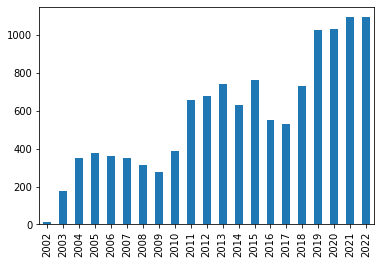

In [36]:
df2.Year.value_counts().plot(kind='bar')

In [215]:
df_2003 = pd.DataFrame(year_2003)
df_2004 = pd.DataFrame(year_2004)
df_2005 = pd.DataFrame(year_2005)
df_2006 = pd.DataFrame(year_2006)
df_2007 = pd.DataFrame(year_2007)
df_2008 = pd.DataFrame(year_2008)
df_2009 = pd.DataFrame(year_2009)
df_2010 = pd.DataFrame(year_2010)
df_2011 = pd.DataFrame(year_2011)
df_2012 = pd.DataFrame(year_2012)
df_2013 = pd.DataFrame(year_2013)
df_2014 = pd.DataFrame(year_2014)
df_2015 = pd.DataFrame(year_2015)
df_2016 = pd.DataFrame(year_2016)
df_2017 = pd.DataFrame(year_2017)
df_2018 = pd.DataFrame(year_2018)
df_2019 = pd.DataFrame(year_2019)
df_2020 = pd.DataFrame(year_2020)
df_2021 = pd.DataFrame(year_2021)



In [216]:
locations_2015 = df_2015.filter(['Air Quality Station Name'])
unique_locations_2015 = df_2015['Air Quality Station Name'].unique()
locations_2016 = df_2016.filter(['Air Quality Station Name'])
unique_locations_2016 = df_2016['Air Quality Station Name'].unique()
locations_2017 = df_2017.filter(['Air Quality Station Name'])
unique_locations_2017 = df_2017['Air Quality Station Name'].unique()
locations_2018 = df_2018.filter(['Air Quality Station Name'])
unique_locations_2018 = df_2018['Air Quality Station Name'].unique()
locations_2019 = df_2019.filter(['Air Quality Station Name'])
unique_locations_2019 = df_2019['Air Quality Station Name'].unique()
locations_2020 = df_2020.filter(['Air Quality Station Name'])
unique_locations_2020 = df_2020['Air Quality Station Name'].unique()
locations_2021 = df_2021.filter(['Air Quality Station Name'])
unique_locations_2021 = df_2021['Air Quality Station Name'].unique()

In [218]:
#2015-2021
#no of locations in last 6 years
for i in (unique_locations_2015, unique_locations_2016, unique_locations_2017, unique_locations_2018, unique_locations_2019, unique_locations_2020, unique_locations_2021):
    brloc6 = len(i)
    print(brloc6)

#names of air stations in last 6 years
for i in (df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021):
    uniloc6 = i['Air Quality Station Name'].unique()
    print(sorted(uniloc6))

#last 6 years: pollutants
for i in (df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021):
    unipol6 = i['Air Pollutant'].unique()
    print(sorted(unipol6))


25
20
19
20
22
22
28
['Belgrade-Bulevar Despota Stefana 54a', 'Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Omladinskih brigada', 'Belgrade-Slavija', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo 1', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac'

In [219]:
#2019-2021
#no of locations in last 3 years
for i in (unique_locations_2019, unique_locations_2020, unique_locations_2021):
    brloc3 = len(i)
    print(brloc3)

#names of air stations in last 3 years
for i in (df_2019, df_2020, df_2021):
    uniqloc3 = i['Air Quality Station Name'].unique()
    print(sorted(uniqloc3))

#last 3 years: pollutants
for i in (df_2019, df_2020, df_2021):
    unipol3 = i['Air Pollutant'].unique()
    print(sorted(unipol3))



22
22
28
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Beocin-Centar', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kosjeric', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-

In [220]:
#izbacivanje 6 lokacija iz df2021
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Beocin-Centar'].index)
df_2021_3 = df_2021_2.drop(df_2021_2["Air Quality Station Name"].loc[df_2021_2["Air Quality Station Name"]=='Kosjeric'].index)
df_2021_4 = df_2021_3.drop(df_2021_3["Air Quality Station Name"].loc[df_2021_3["Air Quality Station Name"]=='Novi Pazar'].index)
df_2021_5 = df_2021_4.drop(df_2021_4["Air Quality Station Name"].loc[df_2021_4["Air Quality Station Name"]=='Obrenovac-Centar'].index)
df_2021_6 = df_2021_5.drop(df_2021_5["Air Quality Station Name"].loc[df_2021_5["Air Quality Station Name"]=='Popovac'].index)
fixdf_2021 = df_2021_6.drop(df_2021_6["Air Quality Station Name"].loc[df_2021_6["Air Quality Station Name"]=='Uzice'].index)

In [221]:
#TEST za df2021
ul_2021 = fixdf_2021['Air Quality Station Name'].unique()
print(sorted(ul_2021))


['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Smederevo-Centar', 'Valjevo', 'Vranje', 'Zajecar']


In [222]:
#EDA last 3 years
#df_2019, df_2020, fixdf_2021

#2019
CO_2019 = df_2019.loc[df_2019['Air Pollutant'] == "CO"]
NO2_2019 = df_2019.loc[df_2019['Air Pollutant'] == "NO2"]
O3_2019 = df_2019.loc[df_2019['Air Pollutant'] == "O3"]
PM10_2019 = df_2019.loc[df_2019['Air Pollutant'] == "PM10"]
SO2_2019 = df_2019.loc[df_2019['Air Pollutant'] == "SO2"]


In [223]:
CO_2019_station_means = CO_2019.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_CO_2019_means = CO_2019_station_means.nlargest(10)

CO_2019_station_max = CO_2019.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_CO_2019_max = CO_2019_station_max.nlargest(10)

print(top_CO_2019_means, top_CO_2019_max)

Air Quality Station Name
Zajecar                         2.830625
Vranje                          2.374125
Belgrade-Stari grad             1.369750
Novi Sad-Rumenacka              1.182000
Krusevac                        1.175875
Valjevo                         1.139250
Nis-Osnovna skola Sveti Sava    1.030500
Smederevo-Carina                0.674750
Belgrade-Mostar                 0.641375
Cacak-Institut                  0.600500
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Zajecar                         16.950
Vranje                          13.325
Krusevac                         7.983
Valjevo                          7.874
Nis-Osnovna skola Sveti Sava     7.190
Belgrade-Stari grad              4.520
Smederevo-Carina                 4.504
Belgrade-Mostar                  4.256
Novi Sad-Rumenacka               4.100
Cacak-Institut                   4.061
Name: Air Pollution Level, dtype: float64


In [224]:
#za cp u eksel
cotest = pd.DataFrame(top_CO_2019_means)
cotest

Air Pollution Level
Air Quality Station Name                         
Zajecar                                  2.830625
Vranje                                   2.374125
Belgrade-Stari grad                      1.369750
Novi Sad-Rumenacka                       1.182000
Krusevac                                 1.175875
Valjevo                                  1.139250
Nis-Osnovna skola Sveti Sava             1.030500
Smederevo-Carina                         0.674750
Belgrade-Mostar                          0.641375
Cacak-Institut                           0.600500

In [225]:
#za cp u eksel
cotest2 = pd.DataFrame(top_CO_2019_max)
cotest2

Air Pollution Level
Air Quality Station Name                         
Zajecar                                    16.950
Vranje                                     13.325
Krusevac                                    7.983
Valjevo                                     7.874
Nis-Osnovna skola Sveti Sava                7.190
Belgrade-Stari grad                         4.520
Smederevo-Carina                            4.504
Belgrade-Mostar                             4.256
Novi Sad-Rumenacka                          4.100
Cacak-Institut                              4.061

In [226]:
NO2_2019_station_means = NO2_2019.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_NO2_2019_means = NO2_2019_station_means.nlargest(10)

NO2_2019_station_max = NO2_2019.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_NO2_2019_max = NO2_2019_station_max.nlargest(10)

print(top_NO2_2019_means, top_NO2_2019_max)

Air Quality Station Name
Belgrade-Mostar                 58.398714
Belgrade-Novi Beograd           49.283143
Novi Sad-Rumenacka              48.466214
Belgrade-Stari grad             47.208643
Nis-Osnovna skola Sveti Sava    47.118357
Bor-Institut                    44.551929
Cacak-Institut                  43.624357
Belgrade-Vracar                 40.921857
Valjevo                         39.921071
Smederevo-Carina                36.334357
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Nis-Osnovna skola Sveti Sava    194.820
Belgrade-Novi Beograd           190.809
Belgrade-Mostar                 185.843
Bor-Institut                    175.529
Novi Sad-Rumenacka              163.305
Belgrade-Stari grad             159.867
Cacak-Institut                  157.957
Valjevo                         146.688
Belgrade-Vracar                 125.487
Kragujevac                      120.521
Name: Air Pollution Level, dtype: float64


In [227]:
#za cp u eksel
no2test = pd.DataFrame(top_NO2_2019_means)
no2test

Air Pollution Level
Air Quality Station Name                         
Belgrade-Mostar                         58.398714
Belgrade-Novi Beograd                   49.283143
Novi Sad-Rumenacka                      48.466214
Belgrade-Stari grad                     47.208643
Nis-Osnovna skola Sveti Sava            47.118357
Bor-Institut                            44.551929
Cacak-Institut                          43.624357
Belgrade-Vracar                         40.921857
Valjevo                                 39.921071
Smederevo-Carina                        36.334357

In [228]:
#za cp u eksel
no2test2 = pd.DataFrame(top_NO2_2019_max)
no2test2

Air Pollution Level
Air Quality Station Name                         
Nis-Osnovna skola Sveti Sava              194.820
Belgrade-Novi Beograd                     190.809
Belgrade-Mostar                           185.843
Bor-Institut                              175.529
Novi Sad-Rumenacka                        163.305
Belgrade-Stari grad                       159.867
Cacak-Institut                            157.957
Valjevo                                   146.688
Belgrade-Vracar                           125.487
Kragujevac                                120.521

In [229]:
O3_2019_station_means = O3_2019.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_O3_2019_means = O3_2019_station_means.nlargest(10)

O3_2019_station_max = O3_2019.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_O3_2019_max = O3_2019_station_max.nlargest(10)

print(top_O3_2019_means, top_O3_2019_max)

Air Quality Station Name
Kopaonik                        8525.61872
Kamenicki vis                   5390.62864
Novi Sad-Liman                  3741.72248
Kikinda                         3474.42004
Nis-Osnovna skola Sveti Sava    2743.28276
Belgrade-Stari grad             2290.35784
Belgrade-Novi Beograd           1821.06040
Belgrade-Vracar                  320.21660
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Kopaonik                        64571.108
Kamenicki vis                   38958.334
Novi Sad-Liman                  23518.172
Kikinda                         22920.955
Nis-Osnovna skola Sveti Sava    22015.612
Belgrade-Stari grad             15909.207
Belgrade-Novi Beograd           14339.478
Belgrade-Vracar                  6573.687
Name: Air Pollution Level, dtype: float64


In [230]:
#za cp u eksel
o3test = pd.DataFrame(top_O3_2019_means)
o3test

Air Pollution Level
Air Quality Station Name                         
Kopaonik                               8525.61872
Kamenicki vis                          5390.62864
Novi Sad-Liman                         3741.72248
Kikinda                                3474.42004
Nis-Osnovna skola Sveti Sava           2743.28276
Belgrade-Stari grad                    2290.35784
Belgrade-Novi Beograd                  1821.06040
Belgrade-Vracar                         320.21660

In [231]:
#za cp u eksel
o3test2 = pd.DataFrame(top_O3_2019_max)
o3test2

Air Pollution Level
Air Quality Station Name                         
Kopaonik                                64571.108
Kamenicki vis                           38958.334
Novi Sad-Liman                          23518.172
Kikinda                                 22920.955
Nis-Osnovna skola Sveti Sava            22015.612
Belgrade-Stari grad                     15909.207
Belgrade-Novi Beograd                   14339.478
Belgrade-Vracar                          6573.687

In [232]:
PM10_2019_station_means = PM10_2019.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_PM10_2019_means = PM10_2019_station_means.nlargest(10)

PM10_2019_station_max = PM10_2019.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_PM10_2019_max = PM10_2019_station_max.nlargest(10)

print(top_PM10_2019_means, top_PM10_2019_max)

Air Quality Station Name
Zajecar                  137.334900
Valjevo                  121.047700
Smederevo-Carina          96.395100
Nis-IZJZ                  92.647385
Belgrade-Stari grad       71.095692
Belgrade-Novi Beograd     68.162692
Kostolac                  63.104200
Kragujevac                59.314100
Belgrade-Mostar           56.165231
Novi Sad-Liman            51.835500
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Zajecar                  514.784
Nis-IZJZ                 367.000
Valjevo                  304.498
Belgrade-Stari grad      263.000
Belgrade-Novi Beograd    237.000
Belgrade-Mostar          235.000
Smederevo-Carina         228.740
Novi Sad-Liman           155.092
Kostolac                 134.047
Kragujevac               127.188
Name: Air Pollution Level, dtype: float64


In [233]:
#za cp u eksel
pm10test = pd.DataFrame(top_PM10_2019_means)
pm10test

Air Pollution Level
Air Quality Station Name                     
Zajecar                            137.334900
Valjevo                            121.047700
Smederevo-Carina                    96.395100
Nis-IZJZ                            92.647385
Belgrade-Stari grad                 71.095692
Belgrade-Novi Beograd               68.162692
Kostolac                            63.104200
Kragujevac                          59.314100
Belgrade-Mostar                     56.165231
Novi Sad-Liman                      51.835500

In [234]:
#za cp u eksel
pm10test2 = pd.DataFrame(top_PM10_2019_max)
pm10test2

Air Pollution Level
Air Quality Station Name                     
Zajecar                               514.784
Nis-IZJZ                              367.000
Valjevo                               304.498
Belgrade-Stari grad                   263.000
Belgrade-Novi Beograd                 237.000
Belgrade-Mostar                       235.000
Smederevo-Carina                      228.740
Novi Sad-Liman                        155.092
Kostolac                              134.047
Kragujevac                            127.188

In [235]:
SO2_2019_station_means = SO2_2019.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_SO2_2019_means = SO2_2019_station_means.nlargest(10)

SO2_2019_station_max = SO2_2019.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_SO2_2019_max = SO2_2019_station_max.nlargest(10)

print(top_SO2_2019_means, top_SO2_2019_max)

Air Quality Station Name
Bor-Gradski park                437.566500
Bor-Institut                    323.887125
Kostolac                         82.376188
Zajecar                          51.939875
Belgrade-Novi Beograd            42.720875
Belgrade-Mostar                  35.762813
Novi Sad-Liman                   25.081125
Novi Sad-Rumenacka               22.585812
Nis-Osnovna skola Sveti Sava     22.529125
Kamenicki vis                    21.306937
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Bor-Institut                    2984.000
Bor-Gradski park                2919.000
Kostolac                         545.000
Belgrade-Novi Beograd            330.000
Zajecar                          225.000
Belgrade-Mostar                  194.000
Novi Sad-Rumenacka               132.000
Novi Sad-Liman                   117.000
Nis-Osnovna skola Sveti Sava     111.000
Nis-IZJZ                          88.234
Name: Air Pollution Level, dtype: float64


In [236]:
#za cp u eksel
so2test = pd.DataFrame(top_SO2_2019_means)
so2test

Air Pollution Level
Air Quality Station Name                         
Bor-Gradski park                       437.566500
Bor-Institut                           323.887125
Kostolac                                82.376188
Zajecar                                 51.939875
Belgrade-Novi Beograd                   42.720875
Belgrade-Mostar                         35.762813
Novi Sad-Liman                          25.081125
Novi Sad-Rumenacka                      22.585812
Nis-Osnovna skola Sveti Sava            22.529125
Kamenicki vis                           21.306937

In [237]:
#za cp u eksel
so2test2 = pd.DataFrame(top_SO2_2019_max)
so2test2

Air Pollution Level
Air Quality Station Name                         
Bor-Institut                             2984.000
Bor-Gradski park                         2919.000
Kostolac                                  545.000
Belgrade-Novi Beograd                     330.000
Zajecar                                   225.000
Belgrade-Mostar                           194.000
Novi Sad-Rumenacka                        132.000
Novi Sad-Liman                            117.000
Nis-Osnovna skola Sveti Sava              111.000
Nis-IZJZ                                   88.234

In [ ]:
####################
####################
#2020
####################
####################

In [238]:
#EDA last 3 years
#df_2019, df_2020, fixdf_2021

#2020
CO_2020 = df_2020.loc[df_2020['Air Pollutant'] == "CO"]
NO2_2020 = df_2020.loc[df_2020['Air Pollutant'] == "NO2"]
O3_2020 = df_2020.loc[df_2020['Air Pollutant'] == "O3"]
PM10_2020 = df_2020.loc[df_2020['Air Pollutant'] == "PM10"]
SO2_2020 = df_2020.loc[df_2020['Air Pollutant'] == "SO2"]

In [239]:
CO_2020_station_means = CO_2020.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_CO_2020_means = CO_2020_station_means.nlargest(10)
CO_2020_station_max = CO_2020.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_CO_2020_max = CO_2020_station_max.nlargest(10)

print(top_CO_2020_means, top_CO_2020_max)

Air Quality Station Name
Zajecar                         4.946625
Krusevac                        3.394500
Valjevo                         3.094000
Vranje                          3.024500
Nis-Osnovna skola Sveti Sava    2.354375
Cacak-Institut                  2.046125
Smederevo-Carina                1.786000
Pancevo-Sodara                  1.694500
Belgrade-Mostar                 1.617000
Novi Sad-Rumenacka              1.206500
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Zajecar                         17.50
Vranje                          13.50
Valjevo                         11.50
Krusevac                        11.30
Nis-Osnovna skola Sveti Sava     7.86
Cacak-Institut                   7.74
Smederevo-Carina                 6.66
Pancevo-Sodara                   6.23
Belgrade-Mostar                  4.97
Belgrade-Stari grad              3.95
Name: Air Pollution Level, dtype: float64


In [240]:
#za cp u eksel
cotest20 = pd.DataFrame(top_CO_2020_means)
cotest20

Air Pollution Level
Air Quality Station Name                         
Zajecar                                  4.946625
Krusevac                                 3.394500
Valjevo                                  3.094000
Vranje                                   3.024500
Nis-Osnovna skola Sveti Sava             2.354375
Cacak-Institut                           2.046125
Smederevo-Carina                         1.786000
Pancevo-Sodara                           1.694500
Belgrade-Mostar                          1.617000
Novi Sad-Rumenacka                       1.206500

In [241]:
#za cp u eksel
cotest202 = pd.DataFrame(top_CO_2020_max)
cotest202

Air Pollution Level
Air Quality Station Name                         
Zajecar                                     17.50
Vranje                                      13.50
Valjevo                                     11.50
Krusevac                                    11.30
Nis-Osnovna skola Sveti Sava                 7.86
Cacak-Institut                               7.74
Smederevo-Carina                             6.66
Pancevo-Sodara                               6.23
Belgrade-Mostar                              4.97
Belgrade-Stari grad                          3.95

In [242]:
NO2_2020_station_means = NO2_2020.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_NO2_2020_means = NO2_2020_station_means.nlargest(10)
NO2_2020_station_max = NO2_2020.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_NO2_2020_max = NO2_2020_station_max.nlargest(10)

print(top_NO2_2020_means, top_NO2_2020_max)

Air Quality Station Name
Belgrade-Mostar                 50.139286
Belgrade-Vracar                 46.752143
Belgrade-Novi Beograd           45.043571
Belgrade-Stari grad             43.761929
Bor-Institut                    42.285714
Valjevo                         41.857643
Cacak-Institut                  37.313857
Novi Sad-Rumenacka              37.196500
Nis-IZJZ                        35.018143
Nis-Osnovna skola Sveti Sava    34.186071
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Valjevo                         180.5
Belgrade-Novi Beograd           172.5
Belgrade-Stari grad             167.9
Belgrade-Mostar                 154.7
Belgrade-Vracar                 153.2
Nis-IZJZ                        136.8
Nis-Osnovna skola Sveti Sava    128.5
Cacak-Institut                  126.6
Novi Sad-Rumenacka              124.0
Bor-Institut                    123.0
Name: Air Pollution Level, dtype: float64


In [243]:
#za cp u eksel
notest20 = pd.DataFrame(top_NO2_2020_means)
notest20

Air Pollution Level
Air Quality Station Name                         
Belgrade-Mostar                         50.139286
Belgrade-Vracar                         46.752143
Belgrade-Novi Beograd                   45.043571
Belgrade-Stari grad                     43.761929
Bor-Institut                            42.285714
Valjevo                                 41.857643
Cacak-Institut                          37.313857
Novi Sad-Rumenacka                      37.196500
Nis-IZJZ                                35.018143
Nis-Osnovna skola Sveti Sava            34.186071

In [244]:
#za cp u eksel
notest202 = pd.DataFrame(top_NO2_2020_max)
notest202

Air Pollution Level
Air Quality Station Name                         
Valjevo                                     180.5
Belgrade-Novi Beograd                       172.5
Belgrade-Stari grad                         167.9
Belgrade-Mostar                             154.7
Belgrade-Vracar                             153.2
Nis-IZJZ                                    136.8
Nis-Osnovna skola Sveti Sava                128.5
Cacak-Institut                              126.6
Novi Sad-Rumenacka                          124.0
Bor-Institut                                123.0

In [245]:
O3_2020_station_means = O3_2020.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_O3_2020_means = O3_2020_station_means.nlargest(10)

O3_2020_station_max = O3_2020.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_O3_2020_max = O3_2020_station_max.nlargest(10)

print(top_O3_2020_means, top_O3_2020_max)

Air Quality Station Name
Kamenicki vis                   4463.26012
Novi Sad-Liman                  4306.26212
Kikinda                         3611.23500
Kopaonik                        2961.99012
Belgrade-Novi Beograd           1754.97544
Nis-Osnovna skola Sveti Sava    1689.90676
Belgrade-Stari grad             1074.74140
Belgrade-Vracar                  399.79256
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Kamenicki vis                   32455.610
Novi Sad-Liman                  31663.620
Kikinda                         25389.366
Kopaonik                        22253.868
Nis-Osnovna skola Sveti Sava    15473.408
Belgrade-Novi Beograd           14614.709
Belgrade-Stari grad             12061.407
Belgrade-Vracar                  7924.709
Name: Air Pollution Level, dtype: float64


In [246]:
#za cp u eksel
o3test20 = pd.DataFrame(top_O3_2020_means)
o3test20

Air Pollution Level
Air Quality Station Name                         
Kamenicki vis                          4463.26012
Novi Sad-Liman                         4306.26212
Kikinda                                3611.23500
Kopaonik                               2961.99012
Belgrade-Novi Beograd                  1754.97544
Nis-Osnovna skola Sveti Sava           1689.90676
Belgrade-Stari grad                    1074.74140
Belgrade-Vracar                         399.79256

In [247]:
#za cp u eksel
o3test202 = pd.DataFrame(top_O3_2020_max)
o3test202

Air Pollution Level
Air Quality Station Name                         
Kamenicki vis                           32455.610
Novi Sad-Liman                          31663.620
Kikinda                                 25389.366
Kopaonik                                22253.868
Nis-Osnovna skola Sveti Sava            15473.408
Belgrade-Novi Beograd                   14614.709
Belgrade-Stari grad                     12061.407
Belgrade-Vracar                          7924.709

In [248]:
PM10_2020_station_means = PM10_2020.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_PM10_2020_means = PM10_2020_station_means.nlargest(10)

PM10_2020_station_max = PM10_2020.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_PM10_2020_max = PM10_2020_station_max.nlargest(10)

print(top_PM10_2020_means, top_PM10_2020_max)

Air Quality Station Name
Zajecar                  142.296100
Valjevo                  125.428800
Nis-IZJZ                 121.653231
Belgrade-Stari grad      108.441615
Smederevo-Carina         103.404200
Belgrade-Novi Beograd     97.620231
Kragujevac                72.186900
Novi Sad-Liman            66.484600
Belgrade-Mostar           60.857308
Belgrade-Vracar           45.643300
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Nis-IZJZ                 670.0
Belgrade-Stari grad      555.0
Belgrade-Novi Beograd    450.0
Zajecar                  401.7
Valjevo                  295.5
Smederevo-Carina         286.9
Belgrade-Mostar          284.0
Novi Sad-Liman           256.3
Kragujevac               187.8
Belgrade-Vracar          184.7
Name: Air Pollution Level, dtype: float64


In [249]:
#za cp u eksel
pm10test20 = pd.DataFrame(top_PM10_2020_means)
pm10test20

Air Pollution Level
Air Quality Station Name                     
Zajecar                            142.296100
Valjevo                            125.428800
Nis-IZJZ                           121.653231
Belgrade-Stari grad                108.441615
Smederevo-Carina                   103.404200
Belgrade-Novi Beograd               97.620231
Kragujevac                          72.186900
Novi Sad-Liman                      66.484600
Belgrade-Mostar                     60.857308
Belgrade-Vracar                     45.643300

In [250]:
#za cp u eksel
pm10test202 = pd.DataFrame(top_PM10_2020_max)
pm10test202

Air Pollution Level
Air Quality Station Name                     
Nis-IZJZ                                670.0
Belgrade-Stari grad                     555.0
Belgrade-Novi Beograd                   450.0
Zajecar                                 401.7
Valjevo                                 295.5
Smederevo-Carina                        286.9
Belgrade-Mostar                         284.0
Novi Sad-Liman                          256.3
Kragujevac                              187.8
Belgrade-Vracar                         184.7

In [254]:
SO2_2020_station_means = SO2_2020.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_SO2_2020_station_means = SO2_2020_station_means.nlargest(10)

SO2_2020_station_max = SO2_2020.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_SO2_2020_station_max = SO2_2020_station_max.nlargest(10)

print(top_SO2_2020_station_means, top_SO2_2020_station_max)

Air Quality Station Name
Bor-Gradski park         718.246625
Bor-Institut             402.455563
Kostolac                  86.437937
Zajecar                   64.200312
Belgrade-Novi Beograd     54.326937
Belgrade-Mostar           48.263562
Belgrade-Vracar           45.023125
Nis-IZJZ                  40.649688
Vranje                    32.407000
Novi Sad-Liman            30.015937
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Bor-Gradski park         4346.0
Bor-Institut             3314.0
Kostolac                  540.0
Belgrade-Mostar           277.0
Belgrade-Novi Beograd     272.0
Zajecar                   271.0
Belgrade-Vracar           260.0
Nis-IZJZ                  239.0
Novi Sad-Liman            191.0
Kamenicki vis             187.0
Name: Air Pollution Level, dtype: float64


In [255]:
#za cp u eksel
so2test20 = pd.DataFrame(top_SO2_2020_station_means)
so2test20

Air Pollution Level
Air Quality Station Name                     
Bor-Gradski park                   718.246625
Bor-Institut                       402.455563
Kostolac                            86.437937
Zajecar                             64.200312
Belgrade-Novi Beograd               54.326937
Belgrade-Mostar                     48.263562
Belgrade-Vracar                     45.023125
Nis-IZJZ                            40.649688
Vranje                              32.407000
Novi Sad-Liman                      30.015937

In [256]:
#za cp u eksel
so2test202 = pd.DataFrame(top_SO2_2020_station_max)
so2test202

Air Pollution Level
Air Quality Station Name                     
Bor-Gradski park                       4346.0
Bor-Institut                           3314.0
Kostolac                                540.0
Belgrade-Mostar                         277.0
Belgrade-Novi Beograd                   272.0
Zajecar                                 271.0
Belgrade-Vracar                         260.0
Nis-IZJZ                                239.0
Novi Sad-Liman                          191.0
Kamenicki vis                           187.0

In [ ]:
####################
####################
#2021
####################
####################

In [275]:
#EDA last 3 years
#df_2019, df_2020, fixdf_2021
#== sampling
#2021
CO_2021 = fixdf_2021.loc[fixdf_2021['Air Pollutant'] == "CO"]
NO2_2021 = fixdf_2021.loc[fixdf_2021['Air Pollutant'] == "NO2"]
O3_2021 = fixdf_2021.loc[fixdf_2021['Air Pollutant'] == "O3"]
PM10_2021 = fixdf_2021.loc[fixdf_2021['Air Pollutant'] == "PM10"]
SO2_2021 = fixdf_2021.loc[fixdf_2021['Air Pollutant'] == "SO2"]

In [276]:
#== sampling
CO_2021_station_means = CO_2021.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_CO_2021_means = CO_2021_station_means.nlargest(10)
CO_2021_station_max = CO_2021.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_CO_2021_max = CO_2021_station_max.nlargest(10)

print(top_CO_2021_means, top_CO_2021_max)

Air Quality Station Name
Valjevo                         13.855625
Novi Sad-Liman                   7.367500
Vranje                           4.615125
Krusevac                         3.307750
Zajecar                          3.166500
Nis-Osnovna skola Sveti Sava     2.780125
Cacak-Institut                   2.497500
Kragujevac                       1.705125
Pancevo-Sodara                   1.607875
Smederevo-Carina                 1.532500
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Valjevo                         97.185
Novi Sad-Liman                  47.921
Vranje                          15.942
Krusevac                        12.471
Zajecar                         12.181
Nis-Osnovna skola Sveti Sava    10.120
Cacak-Institut                   8.677
Smederevo-Carina                 6.860
Novi Sad-Rumenacka               5.157
Kragujevac                       5.110
Name: Air Pollution Level, dtype: float64


In [277]:
#za cp u eksel
cotest21 = pd.DataFrame(top_CO_2021_means)
cotest21

Air Pollution Level
Air Quality Station Name                         
Valjevo                                 13.855625
Novi Sad-Liman                           7.367500
Vranje                                   4.615125
Krusevac                                 3.307750
Zajecar                                  3.166500
Nis-Osnovna skola Sveti Sava             2.780125
Cacak-Institut                           2.497500
Kragujevac                               1.705125
Pancevo-Sodara                           1.607875
Smederevo-Carina                         1.532500

In [279]:
#za cp u eksel
cotest212 = pd.DataFrame(top_CO_2021_max)
cotest212

Air Pollution Level
Air Quality Station Name                         
Valjevo                                    97.185
Novi Sad-Liman                             47.921
Vranje                                     15.942
Krusevac                                   12.471
Zajecar                                    12.181
Nis-Osnovna skola Sveti Sava               10.120
Cacak-Institut                              8.677
Smederevo-Carina                            6.860
Novi Sad-Rumenacka                          5.157
Kragujevac                                  5.110

In [280]:
#== sampling
NO2_2021_station_means = NO2_2021.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_NO2_2021_means = NO2_2021_station_means.nlargest(10)
NO2_2021_station_max = NO2_2021.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_NO2_2021_max = NO2_2021_station_max.nlargest(10)

print(top_NO2_2021_means, top_NO2_2021_max)

Air Quality Station Name
Smederevo-Carina                79.943214
Belgrade-Mostar                 62.386500
Belgrade-Vracar                 51.478214
Belgrade-Stari grad             49.894357
Bor-Institut                    49.133500
Valjevo                         47.438429
Novi Sad-Rumenacka              42.324429
Belgrade-Novi Beograd           41.593000
Nis-IZJZ                        39.370571
Nis-Osnovna skola Sveti Sava    36.037571
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Smederevo-Carina                276.647
Valjevo                         217.165
Belgrade-Mostar                 197.064
Belgrade-Vracar                 188.829
Belgrade-Stari grad             183.686
Belgrade-Novi Beograd           146.866
Zajecar                         145.900
Bor-Institut                    140.764
Novi Sad-Rumenacka              133.728
Nis-Osnovna skola Sveti Sava    132.714
Name: Air Pollution Level, dtype: float64


In [281]:
#za cp u eksel
notest21 = pd.DataFrame(top_NO2_2021_means)
notest21

Air Pollution Level
Air Quality Station Name                         
Smederevo-Carina                        79.943214
Belgrade-Mostar                         62.386500
Belgrade-Vracar                         51.478214
Belgrade-Stari grad                     49.894357
Bor-Institut                            49.133500
Valjevo                                 47.438429
Novi Sad-Rumenacka                      42.324429
Belgrade-Novi Beograd                   41.593000
Nis-IZJZ                                39.370571
Nis-Osnovna skola Sveti Sava            36.037571

In [282]:
#za cp u eksel
notest212 = pd.DataFrame(top_NO2_2021_max)
notest212

Air Pollution Level
Air Quality Station Name                         
Smederevo-Carina                          276.647
Valjevo                                   217.165
Belgrade-Mostar                           197.064
Belgrade-Vracar                           188.829
Belgrade-Stari grad                       183.686
Belgrade-Novi Beograd                     146.866
Zajecar                                   145.900
Bor-Institut                              140.764
Novi Sad-Rumenacka                        133.728
Nis-Osnovna skola Sveti Sava              132.714

In [283]:
#== sampling
O3_2021_station_means = O3_2021.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_O3_2021_means = O3_2021_station_means.nlargest(10)
O3_2021_station_max = O3_2021.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_O3_2021_max = O3_2021_station_max.nlargest(10)

print(top_O3_2021_means, top_O3_2021_max)

Air Quality Station Name
Kopaonik                        5265.137000
Kikinda                         5159.382375
Novi Sad-Liman                  4632.326125
Belgrade-Novi Beograd           4064.095208
Belgrade-Stari grad             4039.714083
Kamenicki vis                   3968.340958
Nis-Osnovna skola Sveti Sava    3134.913083
Belgrade-Vracar                 2821.588167
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Kopaonik                        44466.888
Kikinda                         42676.210
Novi Sad-Liman                  37106.109
Belgrade-Novi Beograd           32746.843
Belgrade-Stari grad             32447.062
Kamenicki vis                   32382.893
Nis-Osnovna skola Sveti Sava    24887.976
Belgrade-Vracar                 20715.554
Name: Air Pollution Level, dtype: float64


In [284]:
#za cp u eksel
o3test21 = pd.DataFrame(top_O3_2021_means)
o3test21

Air Pollution Level
Air Quality Station Name                         
Kopaonik                              5265.137000
Kikinda                               5159.382375
Novi Sad-Liman                        4632.326125
Belgrade-Novi Beograd                 4064.095208
Belgrade-Stari grad                   4039.714083
Kamenicki vis                         3968.340958
Nis-Osnovna skola Sveti Sava          3134.913083
Belgrade-Vracar                       2821.588167

In [285]:
#za cp u eksel
o3test212 = pd.DataFrame(top_O3_2021_max)
o3test212

Air Pollution Level
Air Quality Station Name                         
Kopaonik                                44466.888
Kikinda                                 42676.210
Novi Sad-Liman                          37106.109
Belgrade-Novi Beograd                   32746.843
Belgrade-Stari grad                     32447.062
Kamenicki vis                           32382.893
Nis-Osnovna skola Sveti Sava            24887.976
Belgrade-Vracar                         20715.554

In [286]:
#== sampling
PM10_2021_station_means = PM10_2021.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_PM10_2021_means = PM10_2021_station_means.nlargest(10)
PM10_2021_station_max = PM10_2021.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_PM10_2021_max = PM10_2021_station_max.nlargest(10)

print(top_PM10_2021_means, top_PM10_2021_max)

Air Quality Station Name
Nis-Osnovna skola Sveti Sava    95.614923
Smederevo-Centar                84.024615
Nis-IZJZ                        79.604385
Belgrade-Mostar                 60.756231
Belgrade-Stari grad             59.529154
Novi Sad-Rumenacka              56.794154
Belgrade-Novi Beograd           55.989769
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Nis-Osnovna skola Sveti Sava    610.635
Smederevo-Centar                359.836
Belgrade-Mostar                 359.265
Nis-IZJZ                        341.923
Belgrade-Stari grad             227.108
Novi Sad-Rumenacka              211.664
Belgrade-Novi Beograd           188.998
Name: Air Pollution Level, dtype: float64


In [287]:
#za cp u eksel
pm10test21 = pd.DataFrame(top_PM10_2021_means)
pm10test21

Air Pollution Level
Air Quality Station Name                         
Nis-Osnovna skola Sveti Sava            95.614923
Smederevo-Centar                        84.024615
Nis-IZJZ                                79.604385
Belgrade-Mostar                         60.756231
Belgrade-Stari grad                     59.529154
Novi Sad-Rumenacka                      56.794154
Belgrade-Novi Beograd                   55.989769

In [288]:
#za cp u eksel
pm10test212 = pd.DataFrame(top_PM10_2021_max)
pm10test212

Air Pollution Level
Air Quality Station Name                         
Nis-Osnovna skola Sveti Sava              610.635
Smederevo-Centar                          359.836
Belgrade-Mostar                           359.265
Nis-IZJZ                                  341.923
Belgrade-Stari grad                       227.108
Novi Sad-Rumenacka                        211.664
Belgrade-Novi Beograd                     188.998

In [289]:
#== sampling
SO2_2021_station_means = SO2_2021.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
top_SO2_2021_means = SO2_2021_station_means.nlargest(10)
SO2_2021_station_max = SO2_2021.groupby('Air Quality Station Name')['Air Pollution Level'].max()
top_SO2_2021_max = SO2_2021_station_max.nlargest(10)

print(top_SO2_2021_means, top_SO2_2021_max)

Air Quality Station Name
Novi Sad-Liman           429.089688
Kostolac                 179.929812
Zajecar                   55.059875
Nis-IZJZ                  54.815937
Belgrade-Vracar           42.927687
Belgrade-Novi Beograd     39.793188
Kamenicki vis             39.292375
Novi Sad-Rumenacka        38.833375
Valjevo                   35.655500
Kragujevac                34.605063
Name: Air Pollution Level, dtype: float64 Air Quality Station Name
Novi Sad-Liman           5425.818
Kostolac                 1646.481
Nis-IZJZ                  430.056
Kamenicki vis             288.196
Belgrade-Vracar           236.551
Novi Sad-Rumenacka        225.779
Zajecar                   213.521
Belgrade-Novi Beograd     188.580
Kragujevac                184.216
Valjevo                   171.162
Name: Air Pollution Level, dtype: float64


In [290]:
#za cp u eksel
so2test21 = pd.DataFrame(top_SO2_2021_means)
so2test21

Air Pollution Level
Air Quality Station Name                     
Novi Sad-Liman                     429.089688
Kostolac                           179.929812
Zajecar                             55.059875
Nis-IZJZ                            54.815937
Belgrade-Vracar                     42.927687
Belgrade-Novi Beograd               39.793188
Kamenicki vis                       39.292375
Novi Sad-Rumenacka                  38.833375
Valjevo                             35.655500
Kragujevac                          34.605063

In [291]:
#za cp u eksel
so2test212 = pd.DataFrame(top_SO2_2021_max)
so2test212

Air Pollution Level
Air Quality Station Name                     
Novi Sad-Liman                       5425.818
Kostolac                             1646.481
Nis-IZJZ                              430.056
Kamenicki vis                         288.196
Belgrade-Vracar                       236.551
Novi Sad-Rumenacka                    225.779
Zajecar                               213.521
Belgrade-Novi Beograd                 188.580
Kragujevac                            184.216
Valjevo                               171.162

In [ ]:
#3god kumulativno, 2019-2021
############################
############################